In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import time
from timeit import Timer

from datetime import datetime
from functools import reduce

%matplotlib inline

## Gather

In [70]:
#Load the twitter-archive-enhanced.csv file provided
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download programmatically the image predictions file from Udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [71]:
#Load the image_predictions.tsv file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [4]:
#Twitter API for more data (save to local file)
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = Timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
   # This loop will likely take around ­30 minutes to run because of Twitter's rate limit
   for tweet_id in tweet_ids:
       count += 1
       print(str(count) + ": " + str(tweet_id))        
       try:
           tweet = api.get_status(tweet_id, tweet_mode='extended')
           print("Success")
           json.dump(tweet._json, outfile)
           outfile.write('\n')
       except tweepy.TweepError as e:
           print("Fail")
           fails_dict[tweet_id] = e
           pass
end = Timer()
print(end, start) 
print(fails_dict)
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
tweet_data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_data = tweet_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_data = tweet_data.reset_index(drop=True)
tweet_data

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

NameError: name 'timer' is not defined

In [72]:
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
tweet_data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_data = tweet_data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_data = tweet_data.reset_index(drop=True)
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8259,37850
1,892177421306343426,6103,32526
2,891815181378084864,4041,24491
3,891689557279858688,8410,41205
4,891327558926688256,9109,39386
5,891087950875897856,3027,19798
6,890971913173991426,2000,11572
7,890729181411237888,18343,63874
8,890609185150312448,4160,27210
9,890240255349198849,7175,31200


## Assess

In [6]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
411,823269594223824897,NaN,NaN,2017-01-22 20:42:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Please don't...,8.222448e+17,4.196984e+09,2017-01-20 00:50:15 +0000,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He's a skater pup. He said se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960...,10,10,Wallace,None,None,None,None
1116,732585889486888962,NaN,NaN,2016-05-17 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/732585889...,10,10,None,None,None,None,None
1878,675047298674663426,NaN,NaN,2015-12-10 20:19:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a fluffy albino Bacardi Columbia mix. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675047298...,11,10,a,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8259,37850
1,892177421306343426,6103,32526
2,891815181378084864,4041,24491
3,891689557279858688,8410,41205
4,891327558926688256,9109,39386


In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
retweet_count     2340 non-null object
favorite_count    2340 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Daisy          7
Toby           7
Buddy          7
an             7
Jax            6
Koda           6
Rusty          6
Milo           6
Leo            6
Jack           6
Bella          6
Stanley        6
Oscar          6
Scout          6
Dave           6
Bentley        5
            ... 
Dot            1
Link           1
Edd            1
Trip           1
Edmund         1
Ace            1
Genevieve      1
Rolf           1
Jonah          1
Pilot          1
Dwight         1
Jangle         1
Emanuel        1
Timber         1
Vince          1
Chubbs         1
Freddery       1
Georgie        1
Hanz           1
Lucia          1
Mary           1
Jett           1
Aldrick        1
Laela          1
Pumpkin        1
Strider        1
Iggy           1
Lilli         

In [13]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [18]:
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [19]:
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [20]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2340,2340,2340
unique,2340,1695,2001
top,789599242079838210,1011,0
freq,1,5,167


### Quality

*twitter_archive*

-  Not all names are actual names
-  timestamp and retweeted_status_timestamp are of type 'object'
-  tweet_id is an integer
-  Missing data for expanded urls
-  Ratings incorrectly reported in rating column
-  Only original ratings should be counted, no retweets
-  Many columns have null denoted as None instead of NaN
-  Retweeted columns should be removed

*images*

-  Missing values (2075 rows instead of 2356)
-  p1, p2 and p3 have inconsistent capitalization in the first letter
-  tweet_id is in integer

*df_tweet_info*

-  Missing data (2043 entries instead of 2356)

### Tidiness

-  Three data frames twitter_archive, images and df_tweet_info should be combined in one
-  Dog stage variable (doggo, floofer, pupper and puppo) can be given in one column instead of four
-  Merging multiple dog stages in a row

## Clean

In [177]:
#Make copies of the dataframe to clean
twitter_archive_copy = twitter_archive.copy()
images_copy = images.copy()
tweet_data_copy = tweet_data.copy()

### Quality

#### twitter_archive dataframe

#### Define

#### Not all names are actual names

- Looking visually in Excel, I found that names which start which lowercase letters are innacurate, such as, "a", "an", "the", "incredibly", "very", "mad", "all" etc.
- Also there are missing names which are denoted as None instead of NaN

#### Code

In [178]:
#Finding out all names which start with lowercase letters
lowercase_names = []
for name in twitter_archive['name']:
    if name[0].islower() and name not in lowercase_names:
        lowercase_names.append(name)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [179]:
#Replace all names with lowercase names with NaN
twitter_archive_copy['name'].replace(lowercase_names, np.nan, inplace=True)

#Replace all 'None's with NaN
twitter_archive_copy['name'].replace('None', np.nan, inplace=True)

#### Test

In [180]:
#Check all the lowercase names and 'None' are replaced
twitter_archive_copy.name.value_counts()

Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
Buddy          7
Bailey         7
Daisy          7
Toby           7
Milo           6
Jack           6
Bella          6
Leo            6
Koda           6
Jax            6
Oscar          6
Rusty          6
Stanley        6
Dave           6
Scout          6
Chester        5
Sunny          5
Gus            5
Finn           5
Alfie          5
              ..
Remus          1
Filup          1
Gin            1
Pilot          1
Stewie         1
Deacon         1
Livvie         1
Duddles        1
Jaspers        1
Gerbald        1
Grizzwald      1
Ambrose        1
Tilly          1
Marlee         1
Hamrick        1
Kota           1
Kayla          1
Kial           1
Ivar           1
Vinscent       1
Arlen          1
Furzey         1
Hermione       1
Tater          1
Fletcher       1
Rolf           1
Dixie          1
Kloey         

#### Define

#### Data types are wrong for timestamp and retweeted_status_timestamp

#### Code

In [181]:
#Change the timestamp type to datetime
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)
twitter_archive_copy.retweeted_status_timestamp = pd.to_datetime(twitter_archive_copy.retweeted_status_timestamp)

#### Test

In [182]:
#Confirm the change of data type
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### Define

#### tweet_id is integer

#### Code

In [183]:
#Change tweet_id to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

#### Test

In [184]:
#Check that the datatype for tweet_id has changed
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

#### Define

#### Missing data for expanded urls

#### Code

In [185]:
#If expanded url is null, add url using tweet_id
def add_urls(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id']
        #Make new url
        row['expanded_urls'] = 'http//twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
twitter_archive_copy = twitter_archive_copy.apply(add_urls, axis=1)

#### Test

In [186]:
#Check that there are no empty rows for expanded urls
twitter_archive_copy[twitter_archive_copy['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

#### Inaccurate ratings reported in rating column

Ratings which have decimals are incorrectly reported in rating column. Such as 9.5/10 and 13.5/10 are incorrectly reported as 5/10 for both cases. Similarly, 11.26/10 has been reported as 26/10.

#### Code

In [187]:
#Obtain all text, indices and ratings containing decimals
decimal_ratings_in_text = []
decimal_ratings_in_index = []
decimal_ratings = []

for i, text in twitter_archive_copy['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimal_ratings_in_text.append(text)
        decimal_ratings_in_index.append(i)
        decimal_ratings.append(re.search('\d+\.\d+', text).group())
        
decimal_ratings_in_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [188]:
decimal_ratings_in_index

[45, 340, 695, 763, 1689, 1712]

In [189]:
#Change the rating numerator based on the ratings in text
ratings = twitter_archive_copy.text.str.extract('(\d+(\.\d+)*\/\d+)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [190]:
# Create a new rating column
twitter_archive_copy['ratings'] = ratings[0]

In [191]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12/10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,13/10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,13/10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,13/10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,13/10
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,14/10


In [149]:
#Drop rating_numerator and rating_denominator columns
twitter_archive_copy.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [150]:
#Check that the above corrections are made correctly 
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2356 non-null object
name                          1502 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
ratings                       2356 non-null object
dtypes: datetime64[ns](2), float64(4), object(10)
memory usage: 

#### Define

#### Only original ratings should be counted, no retweets

Entries in which the text start from 'RT @' are dropped

#### Code

In [151]:
#Finding out all retweet entries
retweet_entries = twitter_archive_copy.text.str.match('^RT @')

#All retweet entries are dropped
twitter_archive_copy = twitter_archive_copy[~retweet_entries]

#### Test

In [152]:
#Check that there is no retweet entries
retweet_entries = twitter_archive_copy.text.str.match('^RT @')
twitter_archive_copy[retweet_entries]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,ratings


#### Define

#### Many columns have null denoted as None instead of NaN
Columns like doggo, floofer, pupper and puppo have null denoted as None

#### Code

In [153]:
#Replace the None values of the columns mentioned above with NaN
twitter_archive_copy['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_copy['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_copy['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_copy['puppo'].replace('None', np.nan, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Test

In [154]:
#Check that the None values are gone for one of the column
count = len(twitter_archive_copy[twitter_archive_copy['doggo'] == 'None'])
count

0

#### Define

#### Drop unnecessary columns like in_reply_to_status_id and in_reply_to_user_id and retweet columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp¶

#### Code

In [155]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id',
                                   'in_reply_to_user_id',
                                   'retweeted_status_id',
                                   'retweeted_status_user_id',
                                   'retweeted_status_timestamp'], axis=1)

#### Test

In [156]:
#Check that the unnecessary columns are gone
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
source           2175 non-null object
text             2175 non-null object
expanded_urls    2175 non-null object
name             1391 non-null object
doggo            87 non-null object
floofer          10 non-null object
pupper           234 non-null object
puppo            25 non-null object
ratings          2175 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 203.9+ KB


#### Define

#### p1, p2 and p3 have inconsistent capitalization in the first letter

#### Code

In [192]:
images_copy['p1'] = images_copy['p1'].str.lower()
images_copy['p2'] = images_copy['p2'].str.lower()
images_copy['p3'] = images_copy['p3'].str.lower()

#### Test

In [193]:
images_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
693,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,0.203249,True,samoyed,0.067958,True,great_pyrenees,0.065327,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,pomeranian,0.666957,True,shetland_sheepdog,0.028019,True,ski_mask,0.020683,False
317,671744970634719232,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,1,ice_bear,0.251193,False,ram,0.213839,False,arctic_fox,0.081551,False
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,maltese_dog,0.607401,True,toy_poodle,0.143836,True,sealyham_terrier,0.063907,True
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,samoyed,0.979206,True,pomeranian,0.007185,True,arctic_fox,0.006438,False
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,mexican_hairless,0.008388,True,ice_lolly,0.006206,False
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,weimaraner,0.948688,True,english_setter,0.035352,True,brittany_spaniel,0.003879,True
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,norwegian_elkhound,0.138523,True,wombat,0.074217,False


### Tidiness

#### Define

#### Dog stage variable (doggo, floofer, pupper and puppo) can be given in one column instead of four

#### Code

In [161]:
#Extract the dog_stage from the 'text' column to a new column called 'dog_stage'
twitter_archive_copy['dog_stage'] = twitter_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [162]:
#Check that the extraction is correct
twitter_archive_copy[['dog_stage','doggo','floofer','pupper','puppo']].sample(10)

,dog_stage,doggo,floofer,pupper,puppo
901,doggo,NaN,NaN,NaN,NaN
2324,NaN,NaN,NaN,NaN,NaN
1437,NaN,NaN,NaN,NaN,NaN
1944,NaN,NaN,NaN,NaN,NaN
1051,pupper,doggo,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN
1816,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,NaN,NaN
2145,NaN,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN,NaN


In [163]:
#Drop the doggo, floofer, pupper and puppo columns
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [164]:
#Check that the changes made above are correct
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
source           2175 non-null object
text             2175 non-null object
expanded_urls    2175 non-null object
name             1391 non-null object
ratings          2175 non-null object
dog_stage        295 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 152.9+ KB


#### Define

#### Merge the three dataframes twitter_arcive_copy, images_copy and tweet_data copy into one dataframe

#### Code

In [165]:
#Change the data type of tweet_id to string for images dataframe
images_copy['tweet_id'] = images_copy['tweet_id'].astype(str)
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [166]:
#Change the name of the column 'id' to 'tweet_id' for tweet_data dataframe
tweet_data_copy.rename(columns={'id':'tweet_id'}, inplace=True)

#Change the datatype of tweet_id from int to str
tweet_data_copy['tweet_id'] = tweet_data_copy['tweet_id'].astype(str)

In [167]:
#Merge the images_copy with twitter_archive_copy 
dfs = [twitter_archive_copy, images_copy, tweet_data_copy]
twitter_merge = reduce(lambda left, right:pd.merge(left,right,on='tweet_id'),dfs)

#### Test

In [168]:
#Check the new merged dataframe
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 21 columns):
tweet_id          1992 non-null object
timestamp         1992 non-null datetime64[ns]
source            1992 non-null object
text              1992 non-null object
expanded_urls     1992 non-null object
name              1348 non-null object
ratings           1992 non-null object
dog_stage         268 non-null object
jpg_url           1992 non-null object
img_num           1992 non-null int64
p1                1992 non-null object
p1_conf           1992 non-null float64
p1_dog            1992 non-null bool
p2                1992 non-null object
p2_conf           1992 non-null float64
p2_dog            1992 non-null bool
p3                1992 non-null object
p3_conf           1992 non-null float64
p3_dog            1992 non-null bool
retweet_count     1992 non-null object
favorite_count    1992 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(1), object(13)
me

### Store the clean dataframe

In [169]:
twitter_merge.to_csv('twitter_archive_master.csv')

## Visualize and analyze data

In [2]:
#Load the new cleaned dataset
df_twitter = pd.read_csv('twitter_archive_master.csv')

In [3]:
#Checking the cleaned dataset
df_twitter

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8259,37850
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6103,32526
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4041,24491
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8410,41205
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9109,39386
5,5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,13/10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3027,19798
6,6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13/10,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2000,11572
7,7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,13/10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,18343,63874
8,8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,13/10,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4160,27210
9,9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14/10,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7175,31200


#### Favourite count vs Retweet count

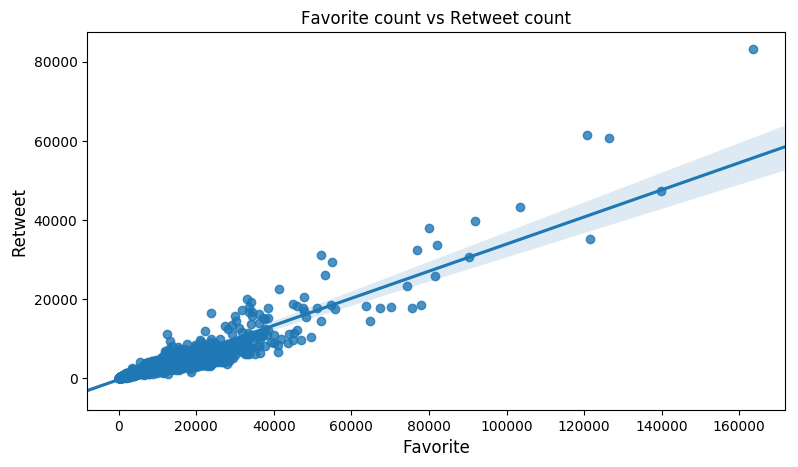

In [171]:
plt.figure(figsize=(9,5), dpi=100)
sns.regplot(x = df_twitter['favorite_count'], y = df_twitter['retweet_count'])
plt.xlabel('Favorite', fontsize = 12)
plt.ylabel('Retweet', fontsize = 12)
plt.title('Favorite count vs Retweet count')
plt.show()

The above figure shows that there is a strong correlation between Favorite count and Retweet count

In [6]:
df_twitter.groupby('dog_stage')['ratings'].describe()

,count,unique,top,freq
dog_stage,,,,
doggo,52,6,12/10,25
floofer,3,3,11/10,1
pupper,192,19,11/10,55
puppo,21,3,12/10,9


The above statistical table obtained by analysis of the rating of dog obtained in different stages shows that the maximum number of rating doggo and puppo obtained is 12/10. Similarly, for pupper it is 11/10.

#### Retweet count and Favorite count statistics on Dog Stages

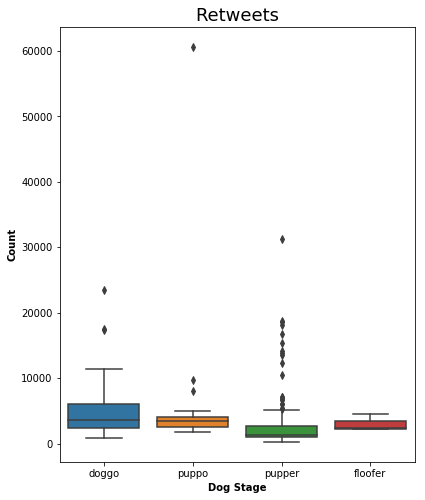

In [20]:
plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=df_twitter.dog_stage, y=df_twitter.retweet_count, linewidth=1.5)
plt.title('Retweets', fontsize=18)
plt.xlabel('Dog Stage', weight='bold')
plt.ylabel('Count', weight='bold');

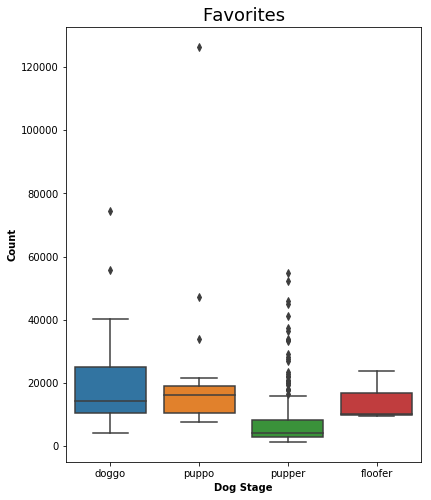

In [16]:
plt.subplots(figsize=(14, 8))
plt.subplot(122)
sns.boxplot(x=df_twitter.dog_stage, y=df_twitter.favorite_count, linewidth=1.5)
plt.title('Favorites', fontsize=18)
plt.xlabel('Dog Stage', weight='bold')
plt.ylabel('Count', weight='bold');

From the above plots of retweet count and favorite count for different dog stages shows that the mean retweet count and favorite count for doggo and puppo are higher than that of pupper and floofer. Although pupper obtained the lowest minimum count of mean favorites and retweets, the outliers are maximum for this stage of dog. 

#### Most common dog breed in this dataset

In [25]:
#Defining attributes for dog breeds
attributes = ['favorite_count', 'retweet_count', 'ratings']
df_breeds = df_twitter[attributes].copy()

In [26]:
#Defining attributes for possible dogs
attributes = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_possible_breeds = df_twitter[attributes].copy()

#Default for dog breeds and confidence
df_possible_breeds['breed'] = ''
df_possible_breeds['breed_conf'] = 1

#Checking which is the most likely breed
def best_breed(row):
    
    #Default to compare
    breed = 'not_dog'
    confidence = 0
    
    #Keep if it os a possible dog
    dog_preds = [(row[['p1', 'p1_dog', 'p1_conf']]), (row[['p2', 'p2_dog', 'p2_conf']]), (row[['p3', 'p3_dog', 'p3_conf']])]
    
    #Reference
    index_breed, index_isdog, index_conf = 0,1,2
    
    for pred in dog_preds:
        if pred[index_isdog]:
            if pred[index_conf] >= confidence:
                breed = pred[index_breed]
                confidence = pred[index_conf]
    row['breed'] = breed
    row['breed_conf'] = confidence
    return row

    breeds = [row['p1'], row['p2'], row['p3']]

df_possible_breeds = df_possible_breeds.apply(best_breed, axis=1)

df_breeds['breed'] = df_possible_breeds['breed']
df_breeds['breed_conf'] = df_possible_breeds['breed_conf']

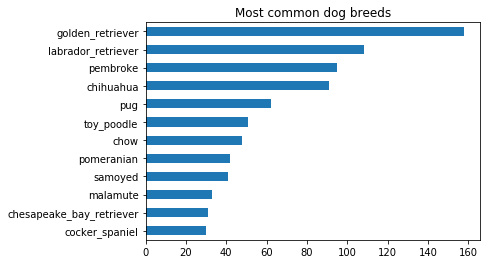

In [27]:
# 12 most common dog breeds
only_dogs = df_breeds['breed'] != 'not_dog'
df_breeds[only_dogs].breed.value_counts()[11::-1].plot(kind = 'barh')
plt.title('Most common dog breeds');

The above figure shows that golden_retriever followed by labrabor_retriever and pembroke are the top three most common dog breed according to the data of WeRateDogs. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act'])